<h1>Parcial 3</h1>
<h2>Por: Camilo Andrés Moreno Laverde</h2>


<h3>1 Describa un algoritmo que determine si existen tres puntos colineales de un conjunto de n puntos dados.</h3>

Teniendo en cuenta la siguiente definición :
<p>Dos o más puntos son colineales cuando al pasar una recta ésta pasa por todos los puntos. Es decir, están en la misma dirección.</p>

https://apuntes123.blogspot.com.co/2007/12/puntos-colineales-y-no-colineales.html

si colineal hace referencia a 3 puntos que estan en una misma recta, los 3 puntos comparten el mismo angulo respecto al eje.

<h1>Solucion:</h1>
<ul>
<li>Tomar el punto p como el origen [0,0].</li>
<li>Para cada punto q, determinar el ángulo que forma con p.</li>
<li>Clasificar los puntos en función de los ángulos que forma con p.</li>
<li>comprobar si cualquiera de los puntos tienen ángulos iguales con p. Si es así, estos puntos, junto con p, son colineales.</li>
</ul>

In [161]:
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
class angulo_counter:
    def __init__(self,angulo,repeticiones):
        self.angulo=angulo
        self.repeticiones=repeticiones


def angulo(p1,p2):
    
    if(p2==[0,0]):
        return 0;
    if(p2[0]-p1[0]==0):
        print(p2[0],p1[0],p2[0]-p1[0])
        m=(p2[0]-p1[0])/(p2[1]-p1[1]);
    else:
        m=(p2[1]-p1[1])/(p2[0]-p1[0]);
    angulo= np.arctan(m)
    return angulo;

def pertenece(lista, e):
    for l in lista:
        
        if(e==l.angulo):
            l.repeticiones=l.repeticiones+1
            return True;
            
    return False;

def colineal(puntos):
    esta=[]
    for p in puntos:
        p0=p
        angulos=[]
        for p in puntos:
            if(p!=p0):
                ang=angulo(p0,p)
                if(ang!=0):
                    angulos.append(ang);
        for a in range(len(angulos)):
            boleano=pertenece(esta, angulos[a])
            if(boleano==False):
                ac=angulo_counter(angulos[a],1)
                esta.append(ac)
            p0=p
         
      
    for l in esta:
        if(l.repeticiones>=3):
            print("hay almenos 3 puntos colineales, los cuales comparten el angulo (en radianes): ",l.angulo);
    



<h1>Ejemplos</h1>


hay almenos 3 puntos colineales, los cuales comparten el angulo (en radianes):  0.785398163397


(-2.0, 6)

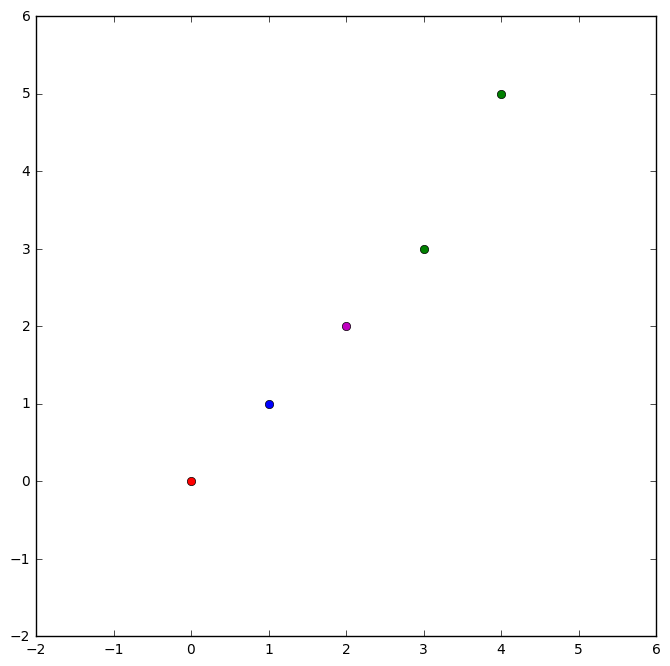

In [162]:
p1=[0,0]
p2=[1,1]
p3=[2,2]
p4=[3,3]
p5=[4,5]
puntos=[p1,p2,p3,p4,p5]
colineal(puntos)


fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(p1[0],p1[1],'ro')
plt.plot(p2[0],p2[1],'bo')
plt.plot(p3[0],p3[1],'mo')
plt.plot(p4[0],p4[1],'go')
plt.plot(p5[0],p5[1],'go')

plt.xlim(-2., 6)
plt.ylim(-2., 6)

(-2.0, 6)

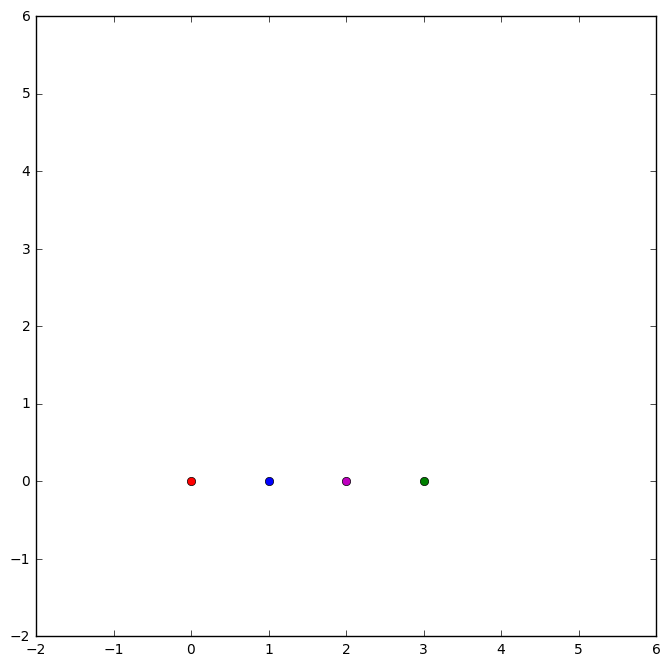

In [163]:
p1=[0,0]
p2=[1,0]
p3=[2,0]
p4=[3,0]
puntos=[p1,p2,p3,p4,p5]
colineal(puntos)


fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(p1[0],p1[1],'ro')
plt.plot(p2[0],p2[1],'bo')
plt.plot(p3[0],p3[1],'mo')
plt.plot(p4[0],p4[1],'go')

plt.xlim(-2., 6)
plt.ylim(-2., 6)

hay almenos 3 puntos colineales, los cuales comparten el angulo (en radianes):  1.10714871779


(-2.0, 10)

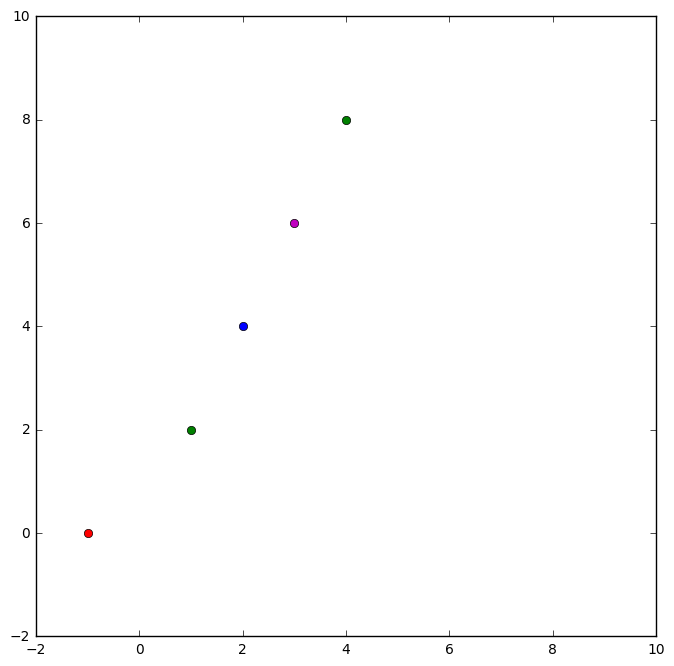

In [165]:
p1=[-1,0]
p2=[2,4]
p3=[3,6]
p4=[4,8]
p5=[1,2]
puntos=[p1,p2,p3,p4,p5]
colineal(puntos)


fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(p1[0],p1[1],'ro')
plt.plot(p2[0],p2[1],'bo')
plt.plot(p3[0],p3[1],'mo')
plt.plot(p4[0],p4[1],'go')
plt.plot(p5[0],p5[1],'go')

plt.xlim(-2., 10)
plt.ylim(-2., 10)

<h3>2 Diseñe un algoritmo que en tiempo O(n lg n) pueda determinar si un poligono definido por una secuencia de n puntos es simple.</h3>

<h3>Solucion 1:</h3>
Es posible determinar esto haciendo uso de varios algoritmos, el primero de ellos es el  Shamos-Hoey Algorithm, el cual se ejecuta en tiempo O(n log n). Por la complejidad del algoritmo no lo implemente tal cual el pseudocodigo que se muestra a continuacion:

<img src="./codigo.jpg"/>


Tomado de:https://www.cp.eng.chula.ac.th/~attawith/class/linint

In [313]:
from sympy.geometry import *
class linea_class:
    def __init__(self,p1,p2):
        self.p1=p1
        self.p2=p2
        
def interseccion(p1,p2,p3,p4):
    if(p2[0]-p1[0]==0 ):
        m1=(p2[0]-p1[0])/(p2[1]-p1[1])
    else:
        m1=(p2[1]-p1[1])/(p2[0]-p1[0])
    if(p4[0]-p3[0]==0):
        m2=(p4[0]-p3[0])/(p4[1]-p3[1])
    else:
        m2=(p4[1]-p3[1])/(p4[0]-p3[0])
    b1=p1[1]-(m1*p1[0])
    b2=p3[1]-(m2*p3[0])
    if(m1-m2!=0):
        x=(b2-b1)/(m1-m2)
        y=(m1*x)+b1
        return x,y
        
    else:
        return -10,-10

def simple_poligon(puntos):

    lineas=[]
    simple=1;
    for p in range(len(puntos)-1):
        linea=linea_class(puntos[p],puntos[p+1]);
        lineas.append(linea)
        
    linea=linea_class(puntos[0], puntos[len(puntos)-1])
    lineas.append(linea)    

    for l in range(len(lineas)-1):
        S1=lineas[l]
        p1=S1.p1
        p2=S1.p2
        for l1 in range(l+1, len(lineas)-1):
            S2=lineas[l1]
            p3=S2.p1
            p4=S2.p2
            x,y = interseccion(p1,p2,p3,p4)
            if(x!=-10):
                pn=[x,y]
                if(p2==pn or p1==pn or p4==pn):
                    simple=1
                else:
                    print("no es un poligono simple")
                    return False
                    
    print(simple)
    if(simple==1):
        print("si es un poligono simple")
        return True;
  

<h1>Ejemplos</h1>


no es un poligono simple
False


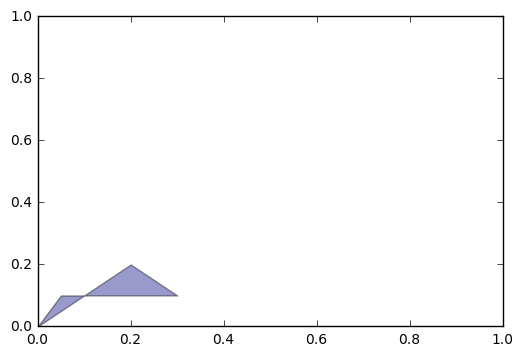

In [314]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
p1=[0,0]
p2=[0.2,0.2]
p3=[0.3,0.1]
p4=[0.05,0.1]
puntos=[p1,p2,p3,p4]
print(simple_poligon(puntos));


fig, ax = plt.subplots()
patches = []


polygon = Polygon([p1,p2,p3,p4], True)
patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
colors = 1000*np.random.rand(len(patches))
p.set_array(np.array(colors))
ax.add_collection(p)

plt.show()

1
si es un poligono simple
True


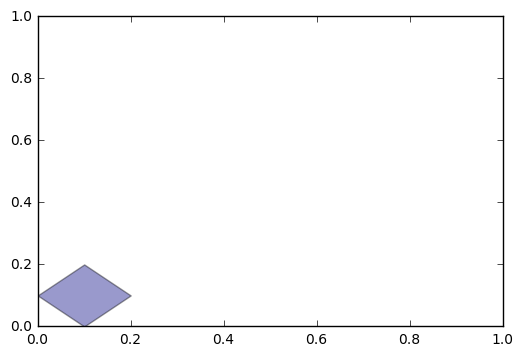

In [315]:
p1=[0,0.1]
p2=[0.1,0]
p3=[0.2,0.1]
p4=[0.1,0.2]
puntos=[p1,p2,p3,p4]
print(simple_poligon(puntos));



fig, ax = plt.subplots()
patches = []


polygon = Polygon([p1,p2,p3,p4], True)
patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
colors = 1000*np.random.rand(len(patches))
p.set_array(np.array(colors))
ax.add_collection(p)

plt.show()

<h3>Solucion 2:</h3>
Usando el teorema que se postula a continuación:
<img src="./triangulacion.jpg"/>


Tomado de:http://ima.udg.edu/~sellares/ComGeo/TriangulationSuri.pdf


Si tenemos en cuenta que un poligono simple se puede triangular al menos 1 vez, es posible comprobar que si al tratar de triangular el poligono, este no se puede triangular sin partirlo en 2, es porque no es un poligono simple.

No implemente el algoritmo debido a su dificultad